In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
training_Set = pd.read_csv("../instructor/Google_Stock_Price_Train.csv")

In [3]:
training_Set.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [4]:
training_Set.shape

(1258, 6)

In [5]:
training_Set = training_Set.iloc[:,1:2].values

In [ ]:
#feature scaling
# as lstm use sigmoid it is better to scale min max 
# than standard scaler

In [7]:
from sklearn.preprocessing import MinMaxScaler

In [8]:
sc = MinMaxScaler()

In [9]:
training_Set = sc.fit_transform(training_Set)

In [11]:
X_train = training_Set[:-1]

In [13]:
y_train = training_Set[1:]

In [14]:
# X-train is todays price, we are going to predict the price tomorrow

In [ ]:
#Reshaping
# /Keras RNN layer expects input in 3 col 
# 

In [16]:
X_train = np.reshape(X_train, (1257,1,1))

In [ ]:
#keras model

In [18]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [19]:
regressor = Sequential()

In [20]:
# input layer and lstm layer
# 4 memory cells
regressor.add(LSTM(units = 4, activation='sigmoid',input_shape=(None,1)))

In [21]:
# adding output layer
# 1 output ie, price at time t+1
regressor.add(Dense(units=1))

In [22]:
# compiling the RNN
regressor.compile(optimizer='adam',loss='mean_squared_error')

In [24]:
regressor.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 4)                 96        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 5         
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________


In [25]:
#fitting the trainingdata
regressor.fit(X_train,y_train,batch_size=32,epochs=200)

Epoch 1/200
1257/1257 [==============================] - 2s - loss: 0.3495     
Epoch 2/200
1257/1257 [==============================] - 0s - loss: 0.2561     
Epoch 3/200
1257/1257 [==============================] - 0s - loss: 0.1877     
Epoch 4/200
1257/1257 [==============================] - 0s - loss: 0.1405     
Epoch 5/200
1257/1257 [==============================] - 0s - loss: 0.1088     
Epoch 6/200
1257/1257 [==============================] - 0s - loss: 0.0891     
Epoch 7/200
1257/1257 [==============================] - 0s - loss: 0.0773     
Epoch 8/200
1257/1257 [==============================] - 0s - loss: 0.0704     
Epoch 9/200
1257/1257 [==============================] - 0s - loss: 0.0666     
Epoch 10/200
1257/1257 [==============================] - 0s - loss: 0.0643     
Epoch 11/200
1257/1257 [==============================] - 0s - loss: 0.0628     
Epoch 12/200
1257/1257 [==============================] - 0s - loss: 0.0617     
Epoch 13/200
1257/1257 [=============

In [ ]:
# making prections and visualizing the results

In [26]:
test_Set = pd.read_csv("../instructor/Google_Stock_Price_Test.csv")

In [28]:
real_stock_price = test_Set.iloc[:,1:2].values

In [29]:
# getting the prediction of stock price of 2017

In [30]:
inputs = real_stock_price

In [31]:
inputs = sc.transform(inputs)

In [32]:
inputs = np.reshape(inputs, (20,1,1))

In [33]:
predicted_stock_price = regressor.predict(inputs)

In [34]:
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [36]:
# visualizing the results

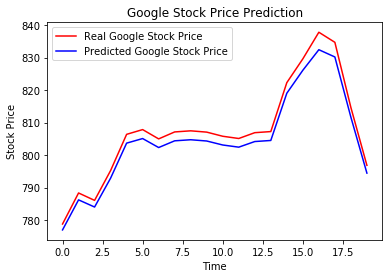

In [37]:
plt.plot(real_stock_price, color='red',label='Real Google Stock Price')
plt.plot(predicted_stock_price, color='blue',label='Predicted Google Stock Price')
plt.title("Google Stock Price Prediction")
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.legend()

In [38]:
#home work

In [39]:
real_stock_price_train = pd.read_csv("../instructor/Google_Stock_Price_Train.csv")
real_stock_price_train = real_stock_price_train.iloc[:,1:2].values

In [40]:
# getting the predicted values for 2012-2016

In [41]:
predicted_stock_price_train = regressor.predict(X_train)

In [42]:
predicted_stock_price_train = sc.inverse_transform(predicted_stock_price_train)

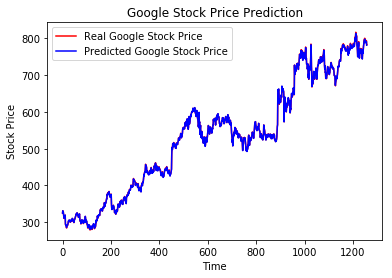

In [43]:
plt.plot(real_stock_price_train, color='red',label='Real Google Stock Price')
plt.plot(predicted_stock_price_train, color='blue',label='Predicted Google Stock Price')
plt.title("Google Stock Price Prediction")
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.legend()

In [44]:
# evaluating the regression models

In [49]:
import math
from sklearn.metrics import mean_squared_error

In [50]:
rmse = math.sqrt(mean_squared_error(real_stock_price,predicted_stock_price))

rmse

In [51]:
rmse

2.982457025437272

In [52]:
rmse/800


0.00372807128179659

In [53]:
#800 is the mean of obsvns